In [45]:
# Practice web scraping using BS4
# Website: Craigslist - Because I want to get a new PC :)

import requests
import re
from bs4 import BeautifulSoup

In [46]:
# Writing a function with argument to handle brand
# list to store all the result
search_result = []

def Read_Craigslist(page_url, brand=None):
    '''
        Helper function
        Put it in a function and loop for a couple of results
        Take a string page_url and check for new mac listings
    ''' 
    data = requests.get(page_url)

    # load data into bs4
    soup = BeautifulSoup(data.text, "html.parser")
    
    # look for the result-info <p> tags
    result_info = soup.find_all('p', {'class':'result-info'})

    # each result-info tag has one listing
    for result in result_info:
        # title of the post item
        title = result.find('a', {'class':"result-title hdrlnk"}).text
        title_str = title.lower()
        
        # price of the post item
        price = result.find('span', {'class':'result-price'}).text
        price = int(price.replace('$', ''))

        # find the year (20XX)
        year_re = re.compile(r'(20\d{2})')
        match = year_re.search(title)

        # from experience, usually if it is cheaper than $100
        # it is usually parts, box, or questionable listing.
        if price < 100 :
            continue
            
        # if the brand option argument is present
        if brand: 
            if brand not in title_str:
                continue
            
        # This is greatly shorten, need more review to document
        # result.find_all() return a list
        # we know by analysis that the link is in the first element
        # and need to retrieve the link using the 'href' index
        link = result.find_all('a', href=True)[0]['href']
        link_str = link if "https://" in link else "NA"

        if match:
            # Extract the year from title
            year = match.group()
        else:
            # for the listing we can't find in the title
            # we will need to visit the page
            listing_html = requests.get(link_str)
            soup2 = BeautifulSoup(listing_html.text, "html.parser")
            body_info = soup2.find('section', {'id': 'postingbody'})
            match_attemp2 = year_re.search(body_info.text)
            year = match_attemp2.group() if match_attemp2 else "NA"

        # determine if what type of machine it is
        if 'imac' in title_str or 'desktop' in title_str:
            cat = 'desktop'
        elif 'macbook' in title_str or 'laptop' in title_str:
            cat = 'laptop'
        elif 'mac pro' in title_str or "mac mini" in title_str:
            cat = 'desktop'
        else:
            cat = "NA"

        # display result with piple delimiter
        new_item = [cat, price, year, title_str, link_str]

        # print the information to the terminal as feedback
        for item in new_item[0:4]:
            # limit to only 50 characters max
            print(str(item).ljust(10)[:50], end='')
        print() # return to new line
        
        # if you want to see the link
        # print('\n' + new_item[4].strip())

        search_result.append(new_item)

In [47]:
# get the data
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac", "mac")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac&s=120", "mac")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac&s=120", "mac")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac&s=240", "mac")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac&s=360", "mac")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=mac&s=480", "mac")

desktop   140       2006      mac pro with 1tb hard drive
desktop   250       2012      ✅ 16gb mac mini 2.5ghz i5 late 2012, 500gb hd maco
desktop   600       2010      mac pro 2010 3.33 ghz 6-core 16gb ram + 2tb hard d
desktop   425       2010      mac pro 2010 tower 16 gbs ram quad core fast 3.46 
desktop   2300      2013      brand new mac pro 3.5ghz 6c 16gb ram 512gb dual at
desktop   670       2018      2018 apple mac mini - 3.6ghz intel i3 - 128gb ssd 
desktop   225       NA        8core macpro 2.8ghz, 500hd, 8gb ram macos 10.11 el
laptop    460       2013      macbook pro 15"
desktop   800       2014      apple mac mini 16 gb ram 1.12 tb & display 27”
laptop    600       2010      macbook pro 15.4 2010
laptop    225       2011      apple mac macbook a1181 white laptop core 2 duo 2g
laptop    625       2010      apple mac macbook pro 15" laptop i5 8 gb ram
laptop    300       2008      apple mac macbook pro a1278 laptop core 2 duo 2.26
desktop   130       2010      ✅ mac mini 2.4

desktop   299       2011      apple imac 27" quad core i7 3.4ghz, 4gb ram, 1tb s
laptop    100       2010      apple macbook pro core 2 duo 2.4ghz 13.3" white mc
laptop    325       NA        macbook pro silver 13 i5 intel apple laptop batter
laptop    200       2011      13inch macbook pro late 2011
desktop   100       2010      #1apple macbook imac repair fix icloud/efi/passwor
laptop    445       NA        macbook air 13.3” i7 processor+8gb ram+warrantied
laptop    100       2011      apple macbook laptop with microsoft office 2011 in
desktop   600       2013      apple late 2013 27" imac 3.2ghz i5 32gb ram 1tb fu
NA        100       2009      efi/ install catalina 10.15 on older macs and fix 
laptop    600       2016      like new!!! macbook air (39 battery cycles, 256gb,
laptop    950       2017      2017 touchbar macbook pro(3.1ghz i5/16gb ram/256gb
laptop    425       2013      13" retina macbook pro, late 2013, 2.4ghz i5, 8gb,
laptop    600       2013      macbook pro 15" 2.8gh

In [89]:
import pandas as pd

header = ['cat', 'price', 'year', 'listing_title', 'link']
apple_df = pd.DataFrame(search_result, columns=header)
                        
# remove duplicated listing and drop any NA classification
apple_df.drop_duplicates(keep=False, inplace=True)
apple_df = apple_df[apple_df.cat != "NA"]
apple_df = apple_df[apple_df.year != "NA"]
apple_df = apple_df[apple_df.year <= "2020"]

apple_df.style.set_properties(**{'text-align': 'left'})

# inspect
apple_df.sample(10)

,cat,price,year,listing_title,link
29,laptop,450,2012,apple mac macbook pro a1278 laptop i5 8 gb ram,https://newyork.craigslist.org/mnh/sys/d/new-y...
5,desktop,670,2018,2018 apple mac mini - 3.6ghz intel i3 - 128gb ...,https://newyork.craigslist.org/mnh/sys/d/new-y...
57,desktop,2300,2013,mac pro 2013,https://newyork.craigslist.org/brk/sys/d/mac-p...
47,desktop,550,2012,mac mini 512 ssd 16gb i7 quad core workhorse,https://newyork.craigslist.org/mnh/sys/d/new-y...
9,laptop,600,2010,macbook pro 15.4 2010,https://newyork.craigslist.org/que/sys/d/jamai...
14,desktop,300,2000,tenba flight softcase for mac pro and other to...,https://newyork.craigslist.org/brx/sys/d/bronx...
48,desktop,400,2012,mac mini,https://newyork.craigslist.org/mnh/sys/d/new-y...
73,laptop,1400,2016,"15"" macbook pro touchbar mojave, 2.8ghz, 256gb...",https://newyork.craigslist.org/mnh/sys/d/new-y...
74,laptop,500,2015,12” macbook 2015,https://newyork.craigslist.org/brk/sys/d/brook...
31,desktop,125,2007,"2007 mac pro 2 x 2.66 ghz dual core, 2tb hard ...",https://newyork.craigslist.org/mnh/sys/d/new-y...


In [90]:
# how many laptop and desktop are there respectively?
# please create a stacked bar graph with year and machine types

# find out how many unique years are there
# return an arrays
years = apple_df.year.unique()

years

array(['2006', '2012', '2010', '2013', '2018', '2014', '2011', '2008',
       '2000', '2009', '2007', '2016', '2019', '2015'], dtype=object)

In [91]:
# then generate a grouped dataframe with the counts of each 
# deskptop and laptop per year
counts = apple_df.groupby(['year', 'cat']).count()['listing_title']
print(counts)

year  cat    
2000  desktop    1
2006  desktop    1
2007  desktop    1
2008  desktop    3
      laptop     1
2009  desktop    1
2010  desktop    9
      laptop     3
2011  desktop    3
      laptop     6
2012  desktop    6
      laptop     2
2013  desktop    9
      laptop     3
2014  desktop    4
      laptop     3
2015  laptop     4
2016  laptop     4
2018  desktop    1
2019  laptop     2
Name: listing_title, dtype: int64


In [92]:
# using that, I can easily calculate the total number of listing per year (group)
totals = counts.sum(level=0)
print(totals)

year
2000     1
2006     1
2007     1
2008     4
2009     1
2010    12
2011     9
2012     8
2013    12
2014     7
2015     4
2016     4
2018     1
2019     2
Name: listing_title, dtype: int64


In [93]:
# to prepare for plotting, transform counts dataframe to separate 
# each cat (laptop/desktop) instead of by index.
# also dropping the "listing_title" because unstack() operation
# creates a multindex and it's easier to work with df without 
# the multiindex.
counts = counts.unstack(level=1)
print(counts)

cat   desktop  laptop
year                 
2000      1.0     NaN
2006      1.0     NaN
2007      1.0     NaN
2008      3.0     1.0
2009      1.0     NaN
2010      9.0     3.0
2011      3.0     6.0
2012      6.0     2.0
2013      9.0     3.0
2014      4.0     3.0
2015      NaN     4.0
2016      NaN     4.0
2018      1.0     NaN
2019      NaN     2.0


In [94]:
# now just need to replace the NaN by 0
counts = counts.fillna(0)

print(type(counts))
print(counts)

<class 'pandas.core.frame.DataFrame'>
cat   desktop  laptop
year                 
2000      1.0     0.0
2006      1.0     0.0
2007      1.0     0.0
2008      3.0     1.0
2009      1.0     0.0
2010      9.0     3.0
2011      3.0     6.0
2012      6.0     2.0
2013      9.0     3.0
2014      4.0     3.0
2015      0.0     4.0
2016      0.0     4.0
2018      1.0     0.0
2019      0.0     2.0


### Count Mac Computers on Craigslist Today

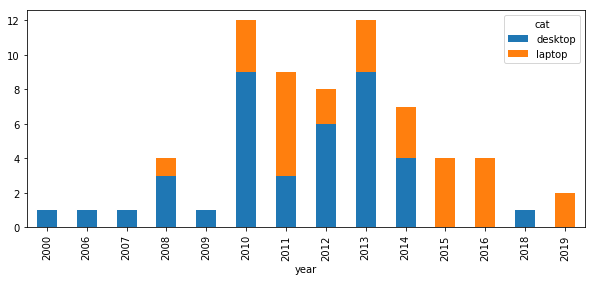

In [95]:
counts.plot.bar(stacked=True, figsize=(10, 4))

In [61]:
# Analysis: There are mostly 2010-2013 desktop,
# with a lot of laptops from 2013-2019.

In [97]:
## What about Dell?

In [ ]:
search_result = []
# get the data
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=dell", "dell")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=dell&s=120", "dell")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=dell&s=120", "dell")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=dell&s=240", "dell")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=dell&s=360", "dell")
Read_Craigslist("https://newyork.craigslist.org/search/sya?query=dell&s=480", "dell")